# EXPLORATORY DATA ANALYSIS

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Imprting Data

In [3]:
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")
data = pd.merge(train_values,train_labels,right_on = "building_id" , left_on = "building_id" )

### Data Management 

In [4]:
data1 = data.iloc[:,0:15].copy()
data1["damage"] = data["damage_grade"].copy()


data1 = data1.drop("other_floor_type" ,axis = 1).copy()

data1 = data1.drop("plan_configuration",axis = 1).copy()
data1 = data1.drop("ground_floor_type" , axis = 1).copy()

data1.columns = ["id" ,"g1" ,"g2", "g3" ,"floors" ,"age" ,"area" ,"height" ,"surface" ,"foundation" ,"roof" ,"position","damage"]
print(data1.head())

       id  g1   g2     g3  floors  age  area  height surface foundation roof  \
0  802906   6  487  12198       2   30     6       5       t          r    n   
1   28830   8  900   2812       2   10     8       7       o          r    n   
2   94947  21  363   8973       2   10     5       5       t          r    n   
3  590882  22  418  10694       2   10     6       5       t          r    n   
4  201944  11  131   1488       3   30     8       9       t          r    n   

  position  damage  
0        t       3  
1        s       2  
2        t       3  
3        s       2  
4        s       3  


### Exploratory Analysis - 

### Univariate analysis 

In [5]:
data1["floors"].value_counts(sort = True)

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: floors, dtype: int64

(array([4.04410e+04, 1.56623e+05, 5.56170e+04, 5.42400e+03, 0.00000e+00,
        2.24600e+03, 2.09000e+02, 3.90000e+01, 1.00000e+00, 1.00000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

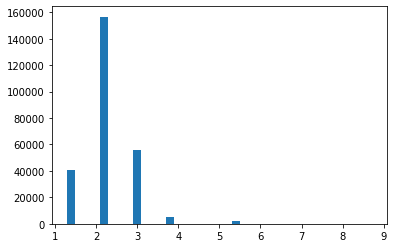

In [6]:
plt.hist(data1["floors"] , bins = 10,rwidth = 0.25)

as you can see for 8-9 floors there are no observations so removing them as outliers should be correct 

995

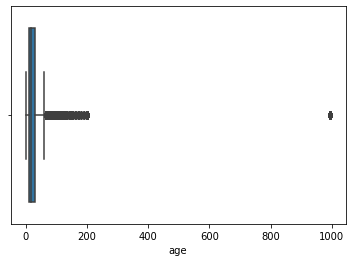

In [7]:
data1["age"].value_counts()
sns.boxplot(data1["age"])
max(data1["age"])

same in this case removing age above 140 can be done as you can see one outlier is present

100

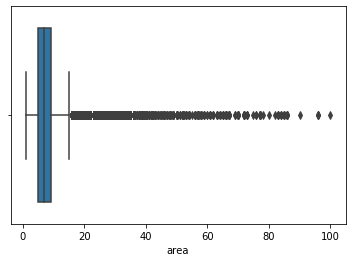

In [8]:
data1["area"].value_counts()
sns.boxplot(data1["area"])
max(data1["area"])

In [9]:
data1["damage"].value_counts()

2    148259
3     87218
1     25124
Name: damage, dtype: int64

In [29]:
data1["surface"].value_counts()

t    215257
n     35372
o      8296
Name: surface, dtype: int64

### Removing Outliers

In [11]:
data1 = data1[(data1["age"]<=140)&(data1["floors"]<=7)].copy()

### Bivariate Analysis

In [12]:
data1.head()

,id,g1,g2,g3,floors,age,area,height,surface,foundation,roof,position,damage
0,802906,6,487,12198,2,30,6,5,t,r,n,t,3
1,28830,8,900,2812,2,10,8,7,o,r,n,s,2
2,94947,21,363,8973,2,10,5,5,t,r,n,t,3
3,590882,22,418,10694,2,10,6,5,t,r,n,s,2
4,201944,11,131,1488,3,30,8,9,t,r,n,s,3


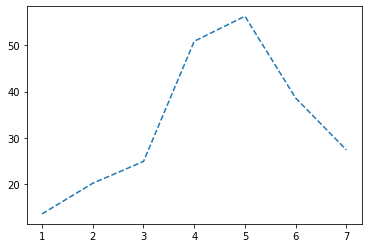

In [13]:
df = data1.groupby("floors").agg({"age":"mean"})
plt.plot(df["age"],"--")

Text(0.5, 0, 'floors')

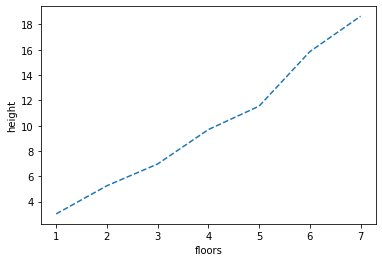

In [14]:
df = data1.groupby("floors").agg({"height":"mean"})
plt.plot(df["height"] ,"--")
plt.ylabel("height")
plt.xlabel("floors")

## Anova test on relation btw height and floors

In [15]:
import statsmodels.formula.api as smf

In [16]:
model = smf.ols(formula = "height~C(floors)" , data = data1).fit()

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                 6.608e+04
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:59:43   Log-Likelihood:            -4.1563e+05
No. Observations:              258925   AIC:                         8.313e+05
Df Residuals:                  258918   BIC:                         8.313e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0315      0.006    504.

P static is very low so that means height and floors are corelated so we can drop floors if we want to

In [18]:
df = data1.groupby("floors").agg({"damage":"mean"})
df

,damage
floors,
1,2.041808
2,2.239688
3,2.397571
4,2.117284
5,2.113647
6,1.862069
7,1.846154


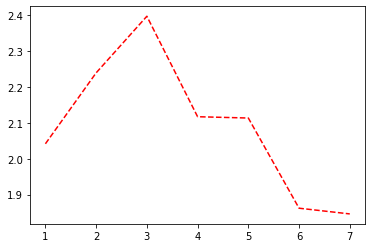

In [19]:
plt.plot(df["damage"] ,"--r")

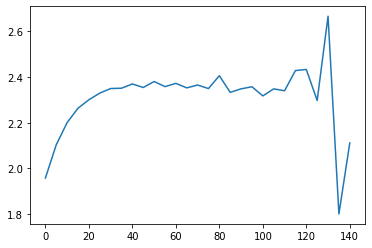

In [20]:
df = data1.groupby("age").agg({"damage":"mean"})
plt.plot(df["damage"])

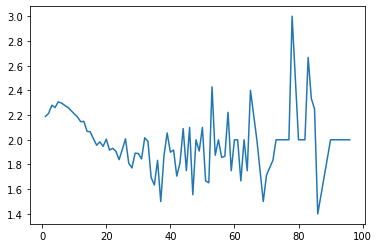

In [21]:
df = data1.groupby("area").agg({"damage":"mean"})
plt.plot(df["damage"])

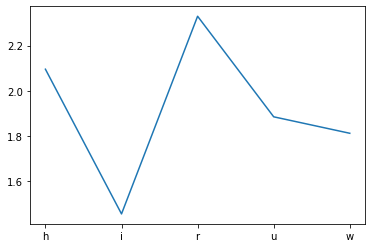

In [22]:
df = data1.groupby("foundation").agg({"damage":"mean"})
plt.plot(df["damage"])

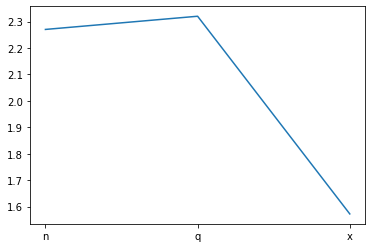

In [23]:
df = data1.groupby("roof").agg({"damage":"mean"})
plt.plot(df["damage"])

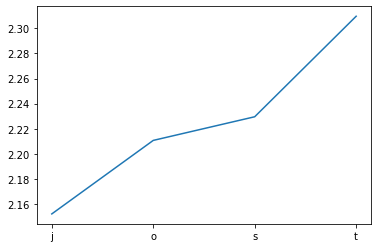

In [24]:
df = data1.groupby("position").agg({"damage":"mean"})
plt.plot(df["damage"])

# MULTIVARIATE Analysis

In [25]:
model = smf.ols(formula = "damage  ~ C(g1) " , data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 damage   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     2443.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:59:46   Log-Likelihood:            -2.0792e+05
No. Observations:              258925   AIC:                         4.159e+05
Df Residuals:                  258894   BIC:                         4.162e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0659      0.009    241.614      0.000       2.049       2.083
C(g1)[T.1]     -0.1052      0.013     -7.813      0.000      -0.132      -0.079
C(g1)[T.2]      0.1121      0.020      5.578      0.000       0.073       0.151
C(g1)[T.3]      0.2671      0.011     25.229      0.000       0.246       0.288
C(g1)[T.4]      0.0963      0.010      9.974      0.000       0.077       0.115
C(g1)[T.5]     -0.1450      0.014    -10.688      0.000      -0.172      -0.118
C(g1)[T.6]      0.0955      0.009     10.341      0.000       0.077       0.114
C(g1)[T.7]      0.2307      0.009     24.520      0.000       0.212       0.249
C(g1)[T.8]      0.4191      0.009     44.563      0.000       0.401       0.438
C(g1)[T.9]     -0.0399      0.012     -3.291      0.001      -0.064      -0.016
C(g1)[T.10]     0.2768      0.009     29.781      0.000       0.259       0.295
C(g1)[T.11]     0.2721      0.010     26.083      0.000       0.252       0.293
C(g1)[T.12]     0.0910      0.013      7.046      0.000       0.066       0.116
C(g1)[T.13]    -0.1270      0.010    -12.483      0.000      -0.147      -0.107
C(g1)[T.14]    -0.0178      0.016     -1.132      0.258      -0.049       0.013
C(g1)[T.15]     0.0725      0.014      5.133      0.000       0.045       0.100
C(g1)[T.16]     0.1058      0.012      8.926      0.000       0.083       0.129
C(g1)[T.17]     0.7285      0.009     78.311      0.000       0.710       0.747
C(g1)[T.18]     0.6392      0.013     49.541      0.000       0.614       0.664
C(g1)[T.19]    -0.0041      0.029     -0.139      0.889      -0.061       0.053
C(g1)[T.20]    -0.1395      0.009    -14.695      0.000      -0.158      -0.121
C(g1)[T.21]     0.4966      0.010     51.553      0.000       0.478       0.515
C(g1)[T.22]    -0.0627      0.011     -5.717      0.000      -0.084      -0.041
C(g1)[T.23]     0.1207      0.018      6.609      0.000       0.085       0.157
C(g1)[T.24]    -0.1579      0.018     -8.989      0.000      -0.192      -0.123
C(g1)[T.25]    -0.0129      0.011     -1.148      0.251      -0.035       0.009
C(g1)[T.26]    -0.3352      0.009    -36.125      0.000      -0.353      -0.317
C(g1)[T.27]     0.3828      0.010     38.935      0.000       0.364       0.402
C(g1)[T.28]     0.3416      0.034      9.970      0.000       0.274       0.409
C(g1)[T.29]     0.0124      0.028      0.435      0.663      -0.043       0.068
C(g1)[T.30]    -0.0461      0.014     -3.412      0.001      -0.073      -0.020
==============================================================================
Omnibus:                     1328.403   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1337.911
Skew:                          -0.170   Prob(JB):                    2.99e-291
Kurtosis:                       2.911   Cond. N

only 22.1 % variablity explanined

In [26]:
model = smf.ols(formula = "damage  ~ g1+g2 " , data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 damage   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     876.4
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:59:46   Log-Likelihood:            -2.3932e+05
No. Observations:              258925   AIC:                         4.786e+05
Df Residuals:                  258922   BIC:                         4.787e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2726      0.003    703.915      0.000       2.266       2.279
g1            -0.0053      0.000    -35.676      0.000      -0.006      -0.005
g2           5.73e-05   2.91e-06     19.703      0.000    5.16e-05     6.3e-05
==============================================================================
Omnibus:                     9762.671   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5036.717
Skew:                          -0.156   Prob(JB):                         0.00
Kurtosis:                       2.392   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

adding g2 decreases rsquared hence not needed

In [27]:
model = smf.ols(formula = "damage  ~ g1+height+area+age " , data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 damage   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2881.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:59:47   Log-Likelihood:            -2.3455e+05
No. Observations:              258925   AIC:                         4.691e+05
Df Residuals:                  258920   BIC:                         4.692e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2708      0.004    507.448      0.000       2.262       2.280
g1            -0.0042      0.000    -28.217      0.000      -0.004      -0.004
height         0.0132      0.001     20.470      0.000       0.012       0.014
area          -0.0175      0.000    -63.442      0.000      -0.018      -0.017
age            0.0044   6.36e-05     69.867      0.000       0.004       0.005
==============================================================================
Omnibus:                    12894.982   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5310.971
Skew:                          -0.080   Prob(JB):                         0.00
Kurtosis:                       2.317   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

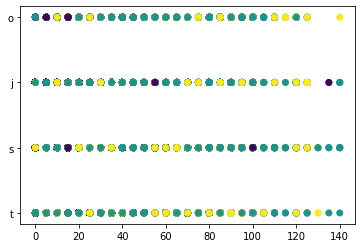

In [28]:
plt.scatter(data1["age"] ,data1["position"] , c = data1["damage"])
plt.show()